In [34]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

def generateX(a, n):
     x_train = []
     y_train = []
     for i in range(len(a)):
         x = a[i:(i + n)]
         if (i + n) < len(a):
             x_train.append(x)
             y_train.append(a[i + n])
         else:
             break
     return np.array(x_train), np.array(y_train)


#feat = ['feat_{}'.format(i) for i in range(74)]

data = pd.read_csv('/content/drive/My Drive/lstmdata.csv', delimiter='\n')

data.dtypes
data

x, y = generateX(data, 10)
#x = x.reshape(-1,10,1)
#y = y.reshape(-1,1)

KeyError: ignored

In [25]:
df1 = data.apply(pd.to_numeric, errors='coerce')
#df1 = df1.drop(['feat_0'], axis=1)
df1

,0.50037
0,0.50073
1,0.50110
2,0.50146
3,0.50183
4,0.50219
...,...
172794,0.77466
172795,0.77497
172796,0.77527
172797,0.77558


Epoch 1/500
100/100 [==============================] - 1s 6ms/step - loss: 0.1828
Epoch 2/500
100/100 [==============================] - 1s 6ms/step - loss: 6.2260e-04
Epoch 3/500
100/100 [==============================] - 1s 5ms/step - loss: 5.9623e-04
Epoch 4/500
100/100 [==============================] - 1s 6ms/step - loss: 5.7227e-04
Epoch 5/500
100/100 [==============================] - 1s 6ms/step - loss: 5.3239e-04
Epoch 6/500
100/100 [==============================] - 1s 6ms/step - loss: 4.9671e-04
Epoch 7/500
100/100 [==============================] - 1s 5ms/step - loss: 4.5550e-04
Epoch 8/500
100/100 [==============================] - 1s 6ms/step - loss: 4.1058e-04
Epoch 9/500
100/100 [==============================] - 1s 6ms/step - loss: 3.6564e-04
Epoch 10/500
100/100 [==============================] - 1s 6ms/step - loss: 3.1644e-04
Epoch 11/500
100/100 [==============================] - 1s 6ms/step - loss: 2.7204e-04
Epoch 12/500
100/100 [==============================] - 

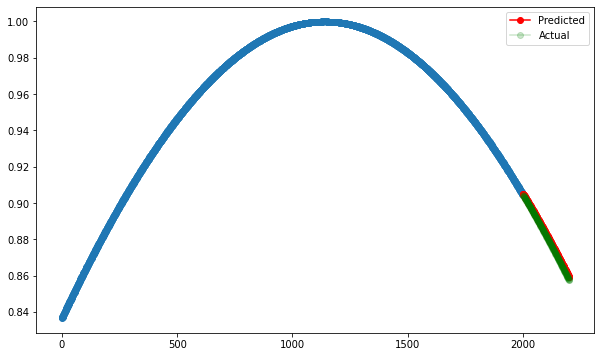

In [53]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

#%matplotlib inline
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *


def generateX(a, n):
     x_train = []
     y_train = []
     for i in range(len(a)):
         x = a[i:(i + n)]
         if (i + n) < len(a):
             x_train.append(x)
             y_train.append(a[i + n])
         else:
             break
     return np.array(x_train), np.array(y_train)



# Sine 함수에 노이즈를 섞은 데이터로 학습 데이터 100개를 생성한다
#data = np.sin(2 * np.pi * 0.03 * np.arange(0, 100)) + np.random.random(100)
#print(data)
#df = pd.read_csv('/content/drive/My Drive/lstmdata.csv', delimiter='\n')

#df.dtypes

#df1 = df.apply(pd.to_numeric, errors='coerce')
#df1 = df1.drop(['feat_0'], axis=1)
#df1

data = np.loadtxt("/content/drive/My Drive/lstmdata.csv", delimiter=",")
#print(a)

#확인하기 print(reader)

x, y = generateX(data, 10)
x = x.reshape(-1,10,1)
y = y.reshape(-1,1)



# 학습용 데이터와 시험용 데이터
x_train = x[1000:3000, :, :]
y_train = y[1000:3000:, :]
x_test = x[3000:3200, :, :]
y_test = y[3000:3200, :]


# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = LSTM(10, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(LSTM(10))(xLstm_1)
xOutput = Dense(1)(xLstm_2)

model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')


# 학습
model.fit(x_train, y_train, epochs=500, batch_size=20,verbose=1)



# 예측
y_hat = model.predict(x_test, batch_size=1)



# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(2000,), 'o-')
plt.plot(b_axis, y_hat.reshape(200,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(200,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()



In [90]:

#print(x_test[1])
print(y_hat)

#print(x_test.size)
#print(x_test[0].size)
print(x_test[199])
array1 = x_test[199][1:]
print(array1)
array2 = [[0.84]]
array3 = np.concatenate([array1, array2]) 
#print(array3)


print(x_test.shape)
print(array3.shape)
array4 = array3.reshape(1,10,1)
print(array4.shape)

array5 = np.concatenate([x_test, array4]) 
y_a = model.predict(array5, batch_size=1)

print(y_a)


[[0.905042  ]
 [0.9048308 ]
 [0.9046191 ]
 [0.9044068 ]
 [0.9041952 ]
 [0.9039829 ]
 [0.9037703 ]
 [0.903558  ]
 [0.9033448 ]
 [0.9031324 ]
 [0.9029192 ]
 [0.9027058 ]
 [0.90249234]
 [0.902279  ]
 [0.9020648 ]
 [0.9018507 ]
 [0.9016362 ]
 [0.90142184]
 [0.9012076 ]
 [0.90099263]
 [0.90077746]
 [0.9005622 ]
 [0.9003461 ]
 [0.9001299 ]
 [0.8999137 ]
 [0.8996975 ]
 [0.8994803 ]
 [0.8992632 ]
 [0.8990459 ]
 [0.8988289 ]
 [0.8986116 ]
 [0.89839464]
 [0.8981775 ]
 [0.89796036]
 [0.8977426 ]
 [0.89752465]
 [0.8973066 ]
 [0.89708835]
 [0.89686966]
 [0.89665055]
 [0.8964314 ]
 [0.8962117 ]
 [0.8959917 ]
 [0.89577156]
 [0.89555186]
 [0.89533186]
 [0.89511114]
 [0.8948902 ]
 [0.89467007]
 [0.89444935]
 [0.8942283 ]
 [0.8940077 ]
 [0.8937861 ]
 [0.89356434]
 [0.8933425 ]
 [0.8931205 ]
 [0.89289874]
 [0.89267606]
 [0.89245325]
 [0.8922305 ]
 [0.892007  ]
 [0.8917835 ]
 [0.8915606 ]
 [0.8913369 ]
 [0.8911133 ]
 [0.8908888 ]
 [0.8906642 ]
 [0.8904397 ]
 [0.89021415]
 [0.8899891 ]
 [0.8897644 ]
 [0.88